# Probability Distributions Exercises

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline


### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

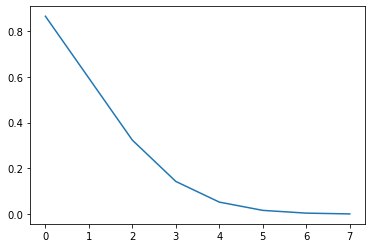

* What is the probability that no cars drive up in the noon hour?
    * ___There is a 13.53% chance that no cars drive up in the noon hour___


* What is the probability that 3 or more cars come through the drive through?
    * ___There is a 14.29% chance that there will be 3 or more cars that come through the drive through.___
    

* How likely is it that the drive through gets at least 1 car?
    * ___There is a 86.47% chance that there will be 1 or more cars that come through the drive through.___

In [52]:

x = np.arange(0, 8, 1)
y = stats.poisson.sf(x, mu=2)

# plt.plot(x, y) # plots dist

no_cars = stats.poisson(2).pmf(0)
no_cars * 100

more_than_three_cars = stats.poisson(2).sf(0)
more_than_three_cars * 100

86.46647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

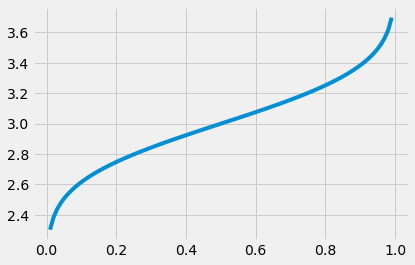

* What grade point average is required to be in the top 5% of the graduating class?
    * ___A GPA of 3.493 is required to be in the top 5% of grad class___
    

* What GPA constitutes the bottom 15% of the class?
    * ___Any GPA lower than 2.689 is considered the bottom 15% of the class.___


* An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    * ___The GPA range would be 2.843 -  2.924 for the third decile.___
    * ___A student with a GPA of 2.8 would not qualify because they are not in the third decile.___


* If I have a GPA of 3.5, what percentile am I in?
    * ___Percentile for a GPA of 3.5 is: 95.22%___



In [261]:
mu = 3.0
sigma = .3

uni_grades = stats.norm(mu, sigma)

x = np.arange(0, 1, .01)
y = uni_grades.ppf(x)

# plt.plot(x, y) # plots dist 
gpa_top_5 = uni_grades.ppf(.95)

# The thrid decile is the anything in the range of 30% so 30 - 40%
third_decile_lower, third_decile_upper = uni_grades.ppf(.30), uni_grades.ppf(.40)
print(f'{third_decile_lower:0.3f} -  {third_decile_upper:0.3f}')

print(f'Percentile for a GPA of 3.5 is: {uni_grades.cdf(3.5)*100:0.2f}%')


2.843 -  2.924
Percentile for a GPA of 3.5 is: 95.22%


### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

* ___There is a 1.98% likelihood that there was a click through rate of 97/4326.___

In [142]:
mu = .02
x1 = 97/4326 # returns decimal of click-throughs
x = np.arange(0.0100, 0.0300, .0001)
y = stats.poisson.sf(x1, mu=.02)

y * 100
# plt.plot(x,y)

1.9801326693244699

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

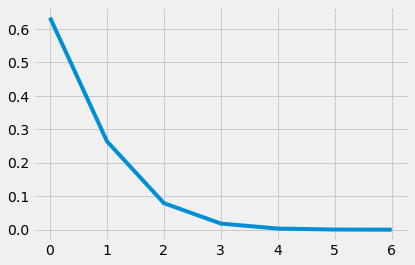

* What is the probability that at least one of your first 60 answers is correct?
    * ___There is a ~12.12% chance that at least one of your first 60 answers would be correct.___



In [136]:
# .001 is the lowest number and you are essentially guessing numbers
# from .01 to .99 and have 100 chances to guess, let's multiply by 
# make the numbers from 1 to 99 just for ease of understanding and math
# There is a 1/100 chance to guess the number on each question

# Graph of chances
x = np.arange(0, 7, 1)
y = stats.binom(100, 1/100).sf(x)

p1of60 = stats.binom(60, 1/100).sf(1)

# plt.plot(x, y)
p1of60 * 100



12.123327131180734

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

* ___There is a 53.17% likelihood that the break area will be cleaned up by at least one person each day.___


* ___There is 2.68% likelihood that they will go two days without cleaning up.___



* ___There is a .0003% likelihood that they will go all week without cleaning the breakroom.___

In [166]:
mu = .03
num_of_studs = .90 * (3 * 22)

cleaned_breakroom = stats.binom(num_of_studs, mu).sf(1)

students_doubled = num_of_studs * 2
cleaned_breakroomx2 = stats.binom(students_doubled, mu).pmf(0)

entireweek = num_of_studs * 7
entire_week__not_cleaned = stats.binom(entireweek, mu).pmf(0)
entire_week_cleaned * 100

0.00031600001839867086

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

* ___There is a 74.75% likelihood that you will have 15 minutes left to eat your food and go back to class, out of one hour.___

In [175]:
mu = 15
sigma = 3
time_to_order = 2
time_to_food = 10
la_pandaeria = stats.norm(mu, sigma)

# Accounting for time to get food and to go back, you can have no more
# than 35 minutes to wait for people (60 - 10 - 15 = 35) 
# 35 / 2 = 17.5 but you can't have half's of people so it must be 17
people_in_line = la_pandaeria.cdf(17)
people_in_line * 100


74.75074624530771

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

* What percent of employees earn less than 60,000?
    * ___The percentage of employees who earn less than 60k are was estimated at 24.39% and ended up being actually at 27.06%.___


* What percent of employees earn more than 95,000?
    * ___The percentage of employees who more than 95k are was estimated at 9.21% and ended up being actually at 10.86%___


* What percent of employees earn between 65,000 and 80,000?
    * ___The likelihood that employees earn between 65k & 80k is 33.51% and the actual value is 32.51%___


* What do the top 5% of employees make?
    * ___The top 5% of employees earn 100484.64 and up and the calculated amount is 104225.85.___


In [262]:
from env import user, password, host



def get_db_url(username: str, hostname: str , password: str, database_name: str):
    '''
    Takes username, hostname, password and database_name and 
    returns a connection string
    '''
    connection = f'mysql+pymysql://{username}:{password}@{hostname}/{database_name}'
    
    return connection

emp_conn = get_db_url(user, host, password, 'employees')


sql = '''
select salary
from salaries
where to_date >=now()
'''

employee_data = pd.read_sql(sql, emp_conn)
sigma = employee_data.std()
mu = employee_data.mean()

employees = stats.norm(mu, sigma)

less_than_60k = employees.cdf(60000)
calculated_60k = (employee_data.salary < 60000).mean()

more_than_90k = employees.sf(95000) # 9.21% 
calculated_90k = (employee_data.salary > 95000).mean() # 10.86% 

between_65k_and_80k =  employees.cdf(80000) - employees.cdf(65000)
calculated_65k_and_80k = ((employee_data.salary > 65000) & (employee_data.salary <80000)).mean()


top_5_percent = employees.ppf(.95)
employee_data.quantile(q =.95)




salary    104225.85
Name: 0.95, dtype: float64